# Comparison of theory and experiment

Basically just try to find the angle shift between the two, see how roadmaps match up.

# Setting up

## Initialization

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import linear_model, metrics, model_selection
from sklearn import preprocessing, compose, metrics, utils
from sklearn.metrics import r2_score
import statsmodels.api as sm

from scipy.optimize import curve_fit

# from Ipython.core.display import display as core_display, HTML
# core_display(HTML("<style>.container { width:60% !important; }</style>"))

import seaborn as sns
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(8.49,6)})
sns.set(font_scale = 1.5)

# import holoviews as hv
# hv.extension("bokeh")
# defaults = {"width": 800, "height": 400, "tools": ["crosshair"], "muted_alpha":0.05}
# hv.opts.defaults(
#     hv.opts.Curve(**defaults),
#     hv.opts.Bars(**defaults),
#     hv.opts.Histogram(**defaults),
#     hv.opts.Points(**defaults),
# )

from pathlib import Path
import io
import sys
import os
import re

import time
from datetime import datetime

from tqdm.notebook import tqdm

# FIND A WAY TO HAVE INTERACTIVE PLOTS!

## Reading, fixing both data

In [18]:
experimental_file = "data_5_deg"
theory_file_id = 1

exp_map = pd.read_csv(f"roadmaps/experiment_roadmap_{experimental_file}.csv")
print(f"Reading experiment from exp. file {experimental_file}.")
# renormalize the strength so that max. is 1
exp_map["strength"]=exp_map["strength"]/exp_map["strength"].max()

# I think exp. picture is inverted. Also, angles above pi/2 are irrelevant.
#exp_map=exp_map[exp_map["angle"]<np.pi/2+0.02]
exp_map=exp_map.rename(columns={"angle": "measured_angle"})
exp_map["angle_reflected"]=np.pi/2-exp_map["measured_angle"]


theory_full_map = pd.read_csv(f"roadmaps/theory_roadmap_{theory_file_id}.csv")#.drop(columns="Unnamed: 0")
# renormalize the strength so that max. is 1
theory_full_map["strength"]=theory_full_map["strength"]/theory_full_map["strength"].max()
# only keep the ones you can experimentally compare to
theory_map = theory_full_map[["angle", "B", "strength"]]

metadata = pd.read_csv(f"roadmaps/theory_roadmap_{theory_file_id}_metadata.csv").rename(columns={"Unnamed: 0": "Parameter", "0": "Value"}).set_index("Parameter")
print(f"Reading theory from theoretical file {theory_file_id}. Theory metadata: ")
metadata

Reading experiment from exp. file data_5_deg.
Reading theory from theoretical file 1. Theory metadata: 


,Value
Parameter,
g-factor,2.000000
D,5.710000
transition_frequency,9.330000
CBg_slope,13.996000
B_low,0.000000
B_high,0.800000
B_steps,200.000000
theta_low,0.000000
theta_high,1.570796


# Finding the phase

Shifting by 4.6 degrees.


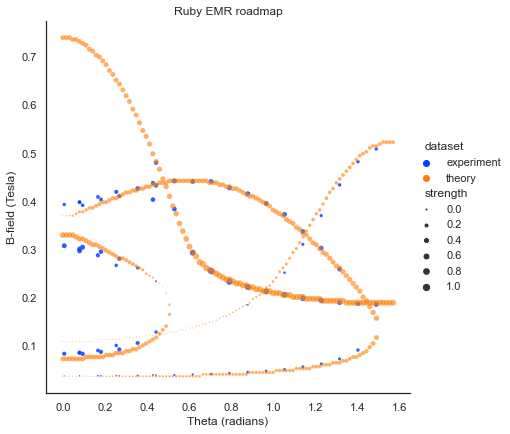

In [19]:
# shift of the angle.
phaseshift = 0.08
print(f"Shifting by {180*phaseshift/np.pi:.1f} degrees.")
def shift_phase(x):
    y = x - phaseshift
    if y<0:
        y=-y
    if y>np.pi/2:
        y=np.pi/2-(y-np.pi/2)
    return y

exp_map["angle"]=exp_map["angle_reflected"].apply(shift_phase)


roadmaps = pd.concat([exp_map.assign(dataset='experiment'), theory_map.assign(dataset='theory')])
sns.set_theme(style="white")
#sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=mpg)
ax = sns.relplot(x="angle", y="B", hue="dataset", size="strength",sizes=(1, 40), alpha=.6, palette="bright",height=6, data=roadmaps)
ax.set(xlabel ="Theta (radians)", ylabel = "B-field (Tesla)", title = "Ruby EMR roadmap")

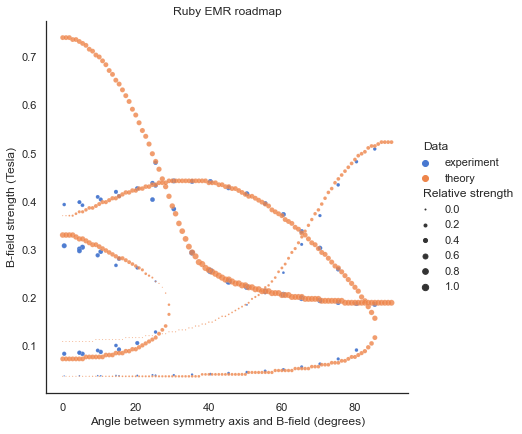

In [24]:
sns.set_theme(style="white")

roadmap_renamed = roadmaps.rename(columns={"dataset": "Data", "strength": "Relative strength"})
roadmap_renamed["angle_deg"]=180/np.pi*roadmap_renamed.angle

#sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=mpg)

# fig, ax = plt.subplots()
# sns.relplot(ax=ax,x="angle_deg", y="B", hue="Data", size="Relative strength",sizes=(1, 40), alpha=0.3, palette="muted",height=6, data=roadmap_renamed[roadmap_renamed.Data=="theory"])
# sns.relplot(ax = ax, x="angle_deg", y="B", hue="Data", size="Relative strength",sizes=(1, 40), alpha=0.8, palette="muted",height=6, data=roadmap_renamed[roadmap_renamed.Data=="experiment"])

# ax.set(xlabel ="Angle between symmetry axis and B-field (degrees)", ylabel = "B-field strength (Tesla)", title = "Ruby EMR roadmap")
# plt.savefig('Both_roadmap.png', dpi=500)
# plt.show()

ax = sns.relplot(x="angle_deg", y="B", hue="Data", size="Relative strength",sizes=(1, 40), alpha=0.8, palette="muted",height=6, data=roadmap_renamed)
ax.set(xlabel ="Angle between symmetry axis and B-field (degrees)", ylabel = "B-field strength (Tesla)", title = "Ruby EMR roadmap")
plt.savefig('both_roadmap.png', dpi=500)